In [1]:
from hep_VQAE import QAEpennylane as pQAE
import pennylane as qml
import tensorflow as tf
from hep_VQAE import data_preprocessing as dp
from pennylane import numpy as np

2022-08-24 18:30:34.209114: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-24 18:30:34.209136: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
INPUT_DATA_SIZE = 12

In [3]:
dev1 = qml.device('lightning.qubit', wires=16)

In [4]:
model = pQAE.ViTConvSQAE(9, 3, dev1, 12, 4, 4, 2, diff_method="adjoint")

/home/tom/Schreibtisch/Arbeit/Research-Projects/hep-VQAE/hep-VQAE/hep_VQAE/QAEpennylane.py:85: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


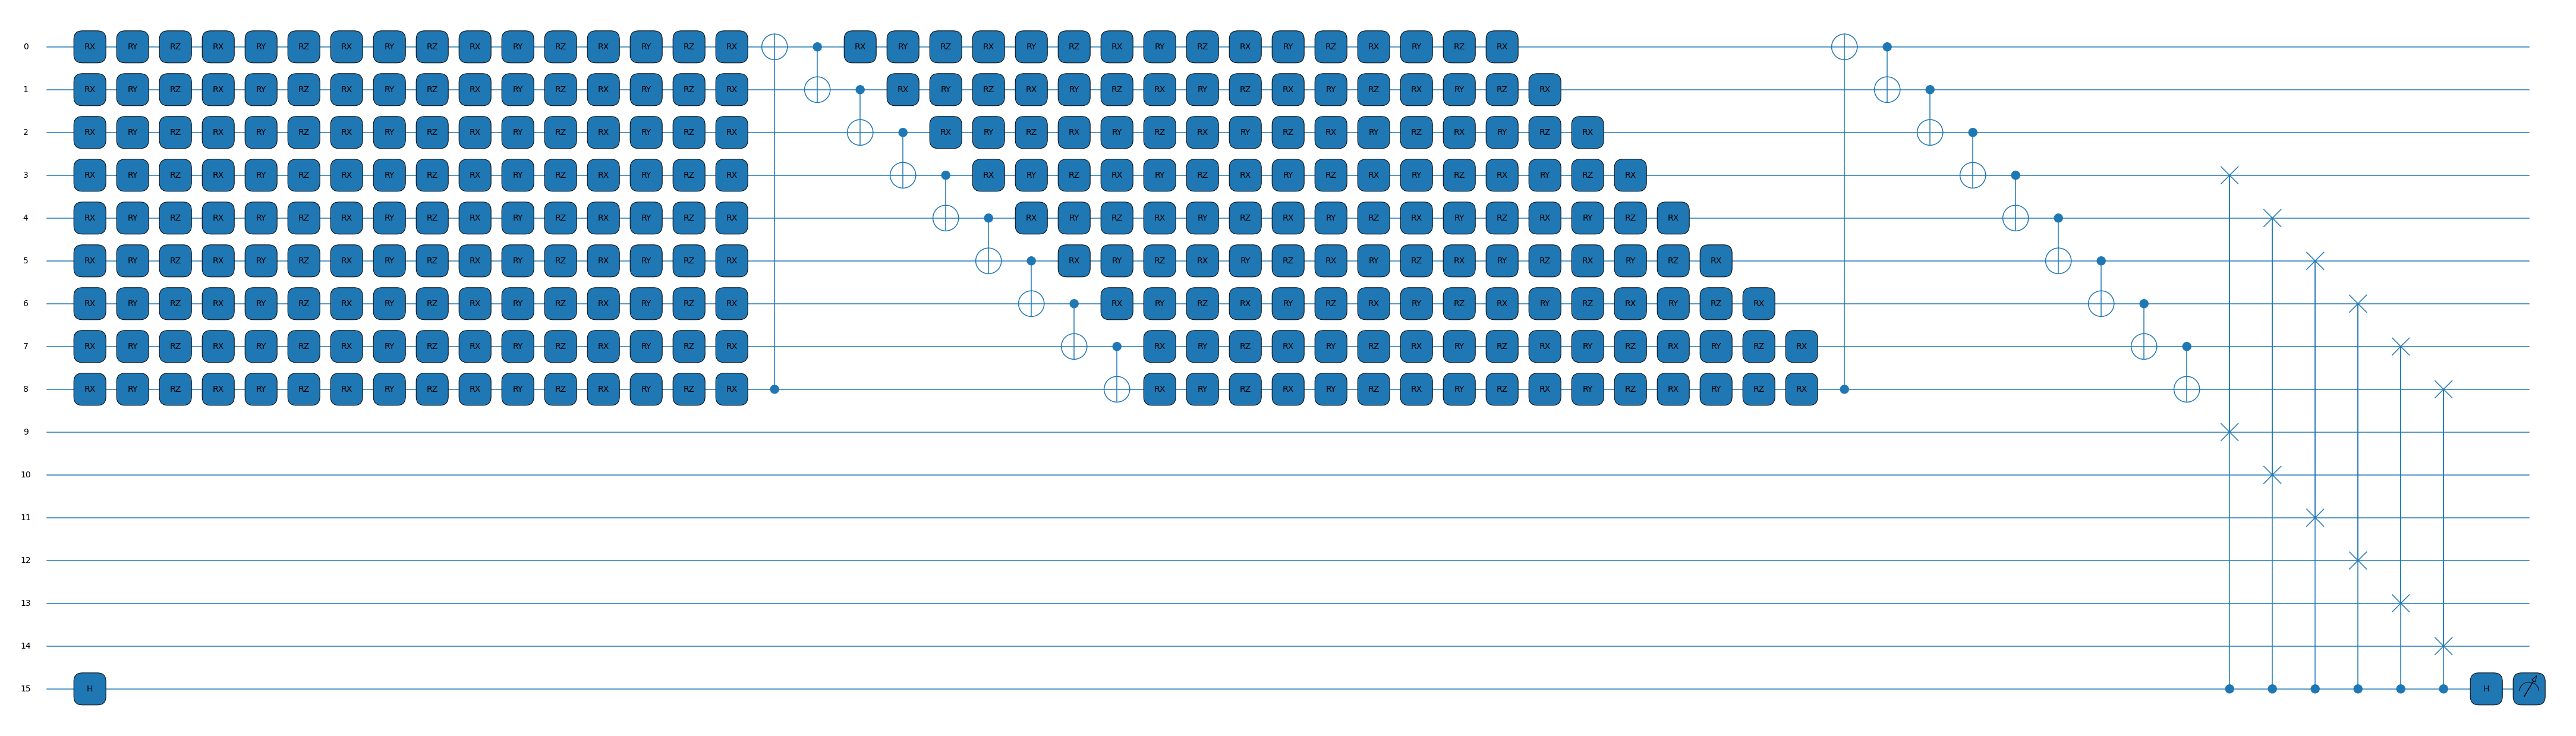

In [5]:
model.plot_circuit()

### data

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

In [7]:
def filter_36(x, y):
    keep = (y == 3) | (y == 6)
    x, y = x[keep], y[keep]
    y = y == 3
    return x,y

x_train, y_train = filter_36(x_train, y_train)
x_test, y_test = filter_36(x_test, y_test)

x_train_threes = np.array(x_train[y_train==True])
x_train = np.array(x_train[y_train==False])

x_test_threes = np.array(x_test[y_test==True])
x_test = np.array(x_test[y_test==False])

In [8]:
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],x_train.shape[2],1))
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))

x_train_threes = x_train_threes.reshape((x_train_threes.shape[0],x_train_threes.shape[1],x_train_threes.shape[2],1))
x_test_threes = x_test_threes.reshape((x_test_threes.shape[0],x_test_threes.shape[1],x_test_threes.shape[2],1))

In [9]:
x_train_small = tf.image.resize(x_train, (INPUT_DATA_SIZE,INPUT_DATA_SIZE), method="lanczos5").numpy()
x_test_small = tf.image.resize(x_test, (INPUT_DATA_SIZE,INPUT_DATA_SIZE), method="lanczos5").numpy()

x_train_3_small = tf.image.resize(x_train_threes, (INPUT_DATA_SIZE,INPUT_DATA_SIZE), method="lanczos5").numpy()
x_test_3_small = tf.image.resize(x_test_threes, (INPUT_DATA_SIZE,INPUT_DATA_SIZE), method="lanczos5").numpy()

2022-08-24 18:30:38.976772: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-24 18:30:38.976796: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-24 18:30:38.976816: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (tomskopfbahnhof): /proc/driver/nvidia/version does not exist
2022-08-24 18:30:38.977089: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
x_train_small = x_train_small.reshape(x_train_small.shape[0],INPUT_DATA_SIZE,INPUT_DATA_SIZE)
x_test_small = x_test_small.reshape(x_test_small.shape[0],INPUT_DATA_SIZE,INPUT_DATA_SIZE)

x_train_3_small = x_train_3_small.reshape(x_train_3_small.shape[0],INPUT_DATA_SIZE,INPUT_DATA_SIZE)
x_test_3_small = x_train_3_small.reshape(x_train_3_small.shape[0],INPUT_DATA_SIZE,INPUT_DATA_SIZE)

In [11]:
x_train_small.shape

(5918, 12, 12)

### train

In [12]:
x_train_small = x_train_small[:3000]

In [13]:
model.train(x_train_small, x_test_small[:200], 
            0.01, 2, 20, print_step_size=5, make_animation=True, x_val_signal=x_test_3_small[:200])

Step: 5       | Loss: 0.91       | avg step time 8.83
Step: 10      | Loss: 0.732      | avg step time 32.0
Step: 15      | Loss: 0.585      | avg step time 37.6
Step: 20      | Loss: 0.487      | avg step time 47.2
Step: 25      | Loss: 0.47       | avg step time 37.6
Step: 30      | Loss: 0.449      | avg step time 33.7
Step: 35      | Loss: 0.413      | avg step time 49.9
Step: 40      | Loss: 0.376      | avg step time 39.9
Step: 45      | Loss: 0.38       | avg step time 35.1
Step: 50      | Loss: 0.372      | avg step time 40.8
Step: 55      | Loss: 0.35       | avg step time 40.2
Step: 60      | Loss: 0.326      | avg step time 34.8
Step: 65      | Loss: 0.328      | avg step time 31.6
Step: 70      | Loss: 0.325      | avg step time 28.9
Step: 75      | Loss: 0.304      | avg step time 27.7
Step: 80      | Loss: 0.292      | avg step time 32.9
Step: 85      | Loss: 0.296      | avg step time 28.2
Step: 90      | Loss: 0.28       | avg step time 31.1
Step: 95      | Loss: 0.277 

In [16]:
model.evaluate(x_test_small[:900], x_test_3_small[:900])


KeyboardInterrupt

